# **Modelo de Predicción**

Vamos a probar varios de los modelos de ensamble a ver cual funciona mejor para nuestro problema de regresión:

In [1]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve

import pickle

import sys

import warnings
warnings.filterwarnings('ignore')


sys.path.append("../")
from src import funciones_problemas_clasificacion as fpc

pd.set_option("display.max_columns", None)


In [2]:
df = pd.read_pickle("../datos/dataframes/df_nonulls_encoded_outliers.pkl")
print(df.shape)
df.head()

(1520, 34)


,Attrition,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0,0.135881,0.112033,0.172805,51,0.145852,0.149254,6,2,0.164852,1,0.118644,131160,1.0,11,0,1.0,6,1,0,0,3,3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.135881,0.162630,0.174194,31,0.254296,0.154150,10,1,0.164852,1,0.256619,41890,0.0,23,1,6.0,3,5,1,4,2,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0.144295,0.162630,0.316753,32,0.254296,0.154150,17,4,0.113687,4,0.118644,193280,1.0,15,3,5.0,2,5,0,3,3,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0.135371,0.112033,0.138979,38,0.076433,0.154150,2,5,0.164852,3,0.118644,83210,3.0,11,3,13.0,5,8,7,5,2,3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.135371,0.228956,0.138979,32,0.145852,0.154150,10,1,0.161826,1,0.256619,23420,4.0,12,2,9.0,2,6,0,4,3,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
vr="Attrition"
modelo_clasificacion = fpc.AnalisisModelosClasificacion(df, vr)

Veamos las métricas para distintos modelos y las comparamos:

### **Logistic Regression**

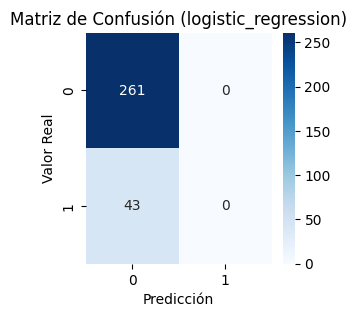

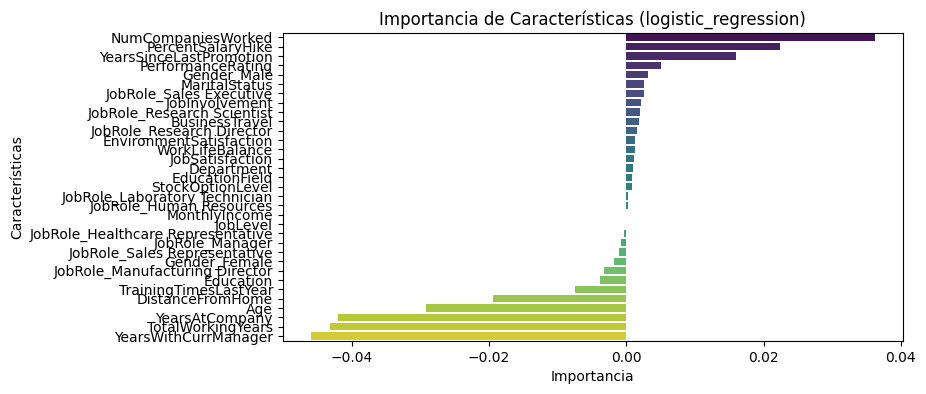

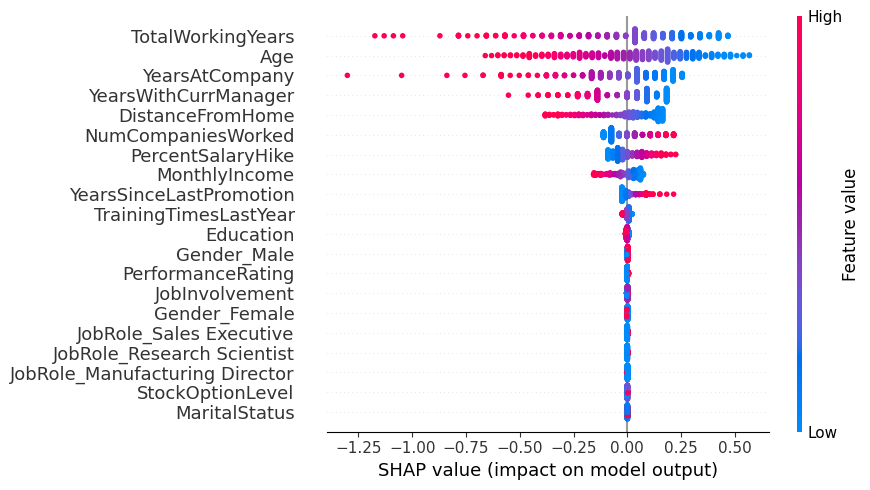

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.836349,0.699479,0.836349,0.761815,0.0,0.693388,0.00201,NaN,NaN,NaN,regresion logistica
test,0.858553,0.737113,0.858553,0.793211,0.0,0.666934,NaN,NaN,0.00201,NaN,regresion logistica


In [4]:
modelo_clasificacion.ajustar_modelo("logistic_regression")

modelo_clasificacion.plot_matriz_confusion("logistic_regression")
modelo_clasificacion.importancia_predictores(modelo_nombre ='logistic_regression')
modelo_clasificacion.plot_shap_summary(modelo_nombre="logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = modelo_clasificacion.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_resultados["modelo"] = "regresion logistica"
df_resultados

### **Decision Tree**

El mejor modelo es DecisionTreeClassifier(max_depth=3)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.855263,0.849155,0.855263,0.810925,0.213899,0.713622,0.000999,16.0,NaN,NaN
test,0.845395,0.791032,0.845395,0.806158,0.089240,0.639624,NaN,NaN,0.000999,16.0


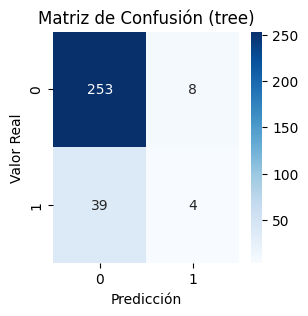

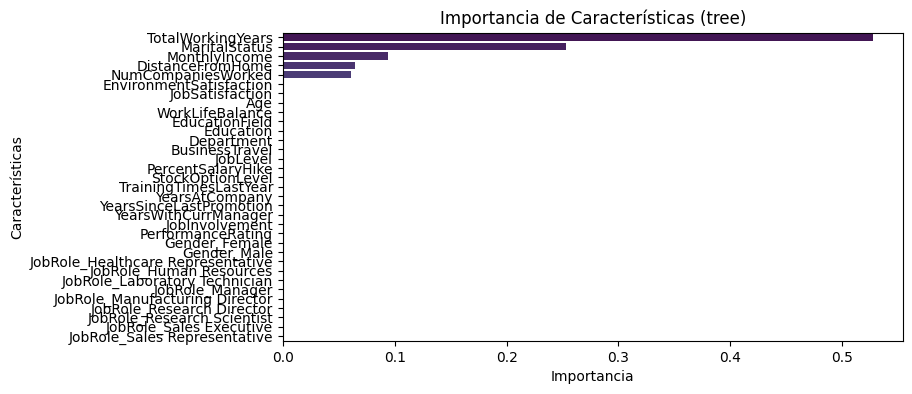

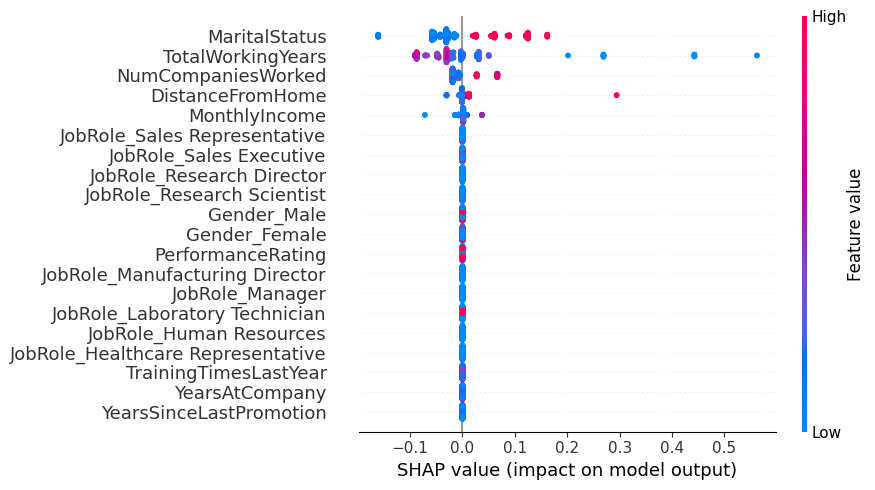

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.855263,0.849155,0.855263,0.810925,0.213899,0.713622,0.000999,16.0,NaN,NaN,decision tree
test,0.845395,0.791032,0.845395,0.806158,0.089240,0.639624,NaN,NaN,0.000999,16.0,decision tree
train,0.836349,0.699479,0.836349,0.761815,0.000000,0.693388,0.002010,NaN,NaN,NaN,regresion logistica
test,0.858553,0.737113,0.858553,0.793211,0.000000,0.666934,NaN,NaN,0.002010,NaN,regresion logistica


In [5]:
# llamamos a la función para ajustar el modelo
modelo_clasificacion.ajustar_modelo("tree")
df_resultados_tree = modelo_clasificacion.calcular_metricas(modelo_nombre =  "tree" )
display(df_resultados_tree)


modelo_clasificacion.plot_matriz_confusion("tree")
modelo_clasificacion.importancia_predictores(modelo_nombre ='tree')
modelo_clasificacion.plot_shap_summary(modelo_nombre="tree")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_tree["modelo"] = "decision tree"
df_resultados_final = pd.concat([df_resultados_tree, df_resultados], axis = 0)
df_resultados_final

# **Random Forest**

El mejor modelo es RandomForestClassifier(max_depth=12, n_jobs=-1)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.987664,0.987844,0.987664,0.987468,0.953528,0.999960,0.051872,-1.0,NaN,NaN
test,0.858553,0.820487,0.858553,0.822655,0.166752,0.770293,NaN,NaN,0.051872,-1.0


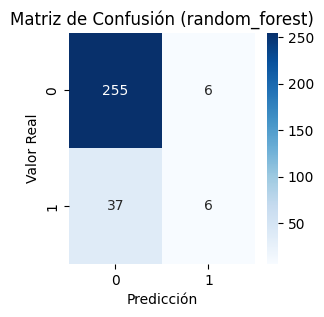

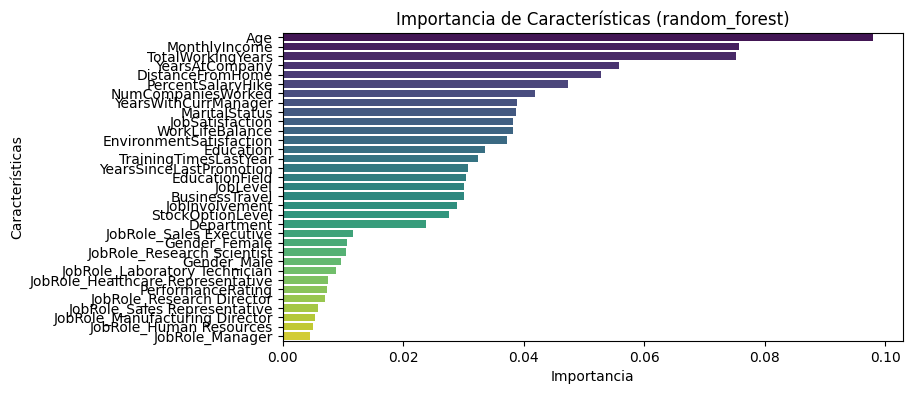

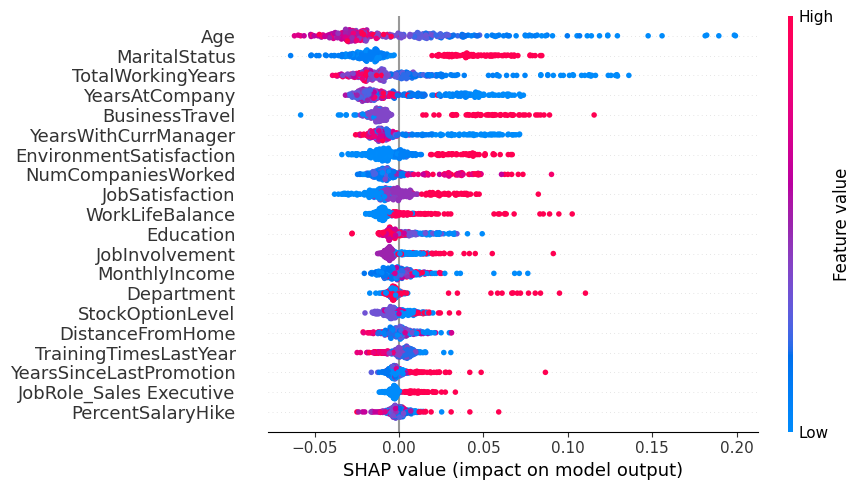

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.987664,0.987844,0.987664,0.987468,0.953528,0.999960,0.051872,-1.0,NaN,NaN,random forest
test,0.858553,0.820487,0.858553,0.822655,0.166752,0.770293,NaN,NaN,0.051872,-1.0,random forest
train,0.855263,0.849155,0.855263,0.810925,0.213899,0.713622,0.000999,16.0,NaN,NaN,decision tree
test,0.845395,0.791032,0.845395,0.806158,0.089240,0.639624,NaN,NaN,0.000999,16.0,decision tree
train,0.836349,0.699479,0.836349,0.761815,0.000000,0.693388,0.002010,NaN,NaN,NaN,regresion logistica
test,0.858553,0.737113,0.858553,0.793211,0.000000,0.666934,NaN,NaN,0.002010,NaN,regresion logistica


In [6]:
modelo_clasificacion.ajustar_modelo("random_forest")
df_resultados_random_forest = modelo_clasificacion.calcular_metricas(modelo_nombre = "random_forest")
display(df_resultados_random_forest)


modelo_clasificacion.plot_matriz_confusion("random_forest")
modelo_clasificacion.importancia_predictores(modelo_nombre ='random_forest')
modelo_clasificacion.plot_shap_summary(modelo_nombre="random_forest")


df_resultados_random_forest["modelo"] = "random forest"
df_resultados_final = pd.concat([df_resultados_random_forest, df_resultados_final], axis = 0)
df_resultados_final

### **Gradient Boosting**

In [ ]:
modelo_clasificacion.ajustar_modelo("gradient_boosting")
df_resultados_gradient_boosting = modelo_clasificacion.calcular_metricas(modelo_nombre = "gradient_boosting")

df_resultados_gradient_boosting["modelo"] = "gradient boosting"
df_resultados_final = pd.concat([df_resultados_gradient_boosting, df_resultados_final], axis = 0)
df_resultados_final

El mejor modelo es GradientBoostingClassifier(learning_rate=0.01, max_depth=4, min_samples_leaf=4,
                           n_estimators=200, subsample=0.8)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.883224,0.895303,0.883224,0.855300,0.405084,0.937421,0.008984,16.0,NaN,NaN
test,0.851974,0.801242,0.851974,0.810291,0.103068,0.738038,NaN,NaN,0.008984,16.0


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.883224,0.895303,0.883224,0.855300,0.405084,0.937421,0.008984,16.0,NaN,NaN,gradient boosting
test,0.851974,0.801242,0.851974,0.810291,0.103068,0.738038,NaN,NaN,0.008984,16.0,gradient boosting
train,0.987664,0.987844,0.987664,0.987468,0.953528,0.999960,0.051872,-1.0,NaN,NaN,random forest
test,0.858553,0.820487,0.858553,0.822655,0.166752,0.770293,NaN,NaN,0.051872,-1.0,random forest
train,0.855263,0.849155,0.855263,0.810925,0.213899,0.713622,0.000999,16.0,NaN,NaN,decision tree
test,0.845395,0.791032,0.845395,0.806158,0.089240,0.639624,NaN,NaN,0.000999,16.0,decision tree
train,0.836349,0.699479,0.836349,0.761815,0.000000,0.693388,0.002010,NaN,NaN,NaN,regresion logistica
test,0.858553,0.737113,0.858553,0.793211,0.000000,0.666934,NaN,NaN,0.002010,NaN,regresion logistica


### **XGBoost**

In [8]:
modelo_clasificacion.ajustar_modelo("xgboost")
df_resultados_xgboost = modelo_clasificacion.calcular_metricas(modelo_nombre = "xgboost")

df_resultados_xgboost["modelo"] = "xgboost"
df_resultados_final = pd.concat([df_resultados_xgboost, df_resultados_final], axis = 0)
df_resultados_final

El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.937500,0.939018,0.937500,0.932270,0.736540,0.982074,0.031001,NaN,NaN,NaN,xgboost
test,0.851974,0.819419,0.851974,0.828076,0.215236,0.757284,NaN,NaN,0.031001,NaN,xgboost
train,0.883224,0.895303,0.883224,0.855300,0.405084,0.937421,0.008984,16.0,NaN,NaN,gradient boosting
test,0.851974,0.801242,0.851974,0.810291,0.103068,0.738038,NaN,NaN,0.008984,16.0,gradient boosting
train,0.987664,0.987844,0.987664,0.987468,0.953528,0.999960,0.051872,-1.0,NaN,NaN,random forest
test,0.858553,0.820487,0.858553,0.822655,0.166752,0.770293,NaN,NaN,0.051872,-1.0,random forest
train,0.855263,0.849155,0.855263,0.810925,0.213899,0.713622,0.000999,16.0,NaN,NaN,decision tree
test,0.845395,0.791032,0.845395,0.806158,0.089240,0.639624,NaN,NaN,0.000999,16.0,decision tree
train,0.836349,0.699479,0.836349,0.761815,0.000000,0.693388,0.002010,NaN,NaN,NaN,regresion logistica
test,0.858553,0.737113,0.858553,0.793211,0.000000,0.666934,NaN,NaN,0.002010,NaN,regresion logistica


Una vez hemos agrupado todas las métricas en un mismo df vamos a ponerlas distintos colores para verlas mejor y analizarlas.

In [63]:
df_resultados_colores = df_resultados_final.copy()
df_resultados_colores.drop(columns=['time_seconds',
       'n_jobs', 'tiempo_computacion(segundos)', 'nucleos_usados'], inplace=True)
df_resultados_colores.reset_index(inplace = True, drop = True)
df_resultados_colores = df_resultados_colores.style.apply(fpc.color_filas_con_borde, axis=1)

df_resultados_colores

,accuracy,precision,recall,f1,kappa,auc,modelo
0,0.937500,0.939018,0.937500,0.932270,0.736540,0.982074,xgboost
1,0.851974,0.819419,0.851974,0.828076,0.215236,0.757284,xgboost
2,0.883224,0.895303,0.883224,0.855300,0.405084,0.937421,gradient boosting
3,0.851974,0.801242,0.851974,0.810291,0.103068,0.738038,gradient boosting
4,0.987664,0.987844,0.987664,0.987468,0.953528,0.999960,random forest
5,0.858553,0.820487,0.858553,0.822655,0.166752,0.770293,random forest
6,0.855263,0.849155,0.855263,0.810925,0.213899,0.713622,decision tree
7,0.845395,0.791032,0.845395,0.806158,0.089240,0.639624,decision tree
8,0.836349,0.699479,0.836349,0.761815,0.000000,0.693388,regresion logistica
9,0.858553,0.737113,0.858553,0.793211,0.000000,0.666934,regresion logistica


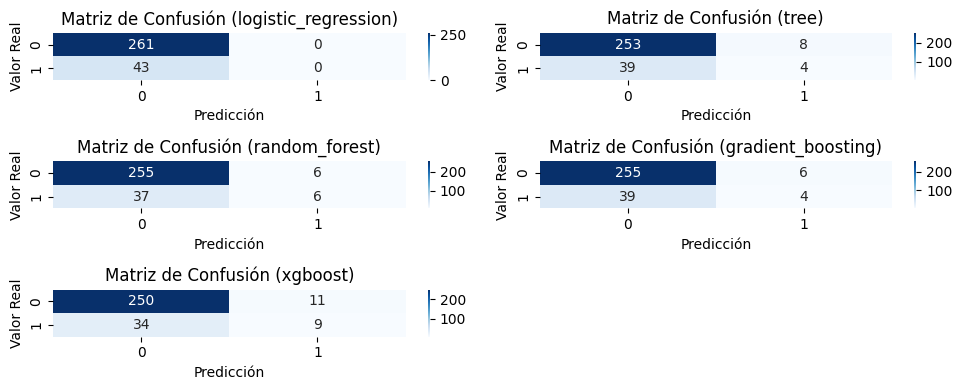

In [46]:
modelo_clasificacion.plot_all_matriz_confusion()

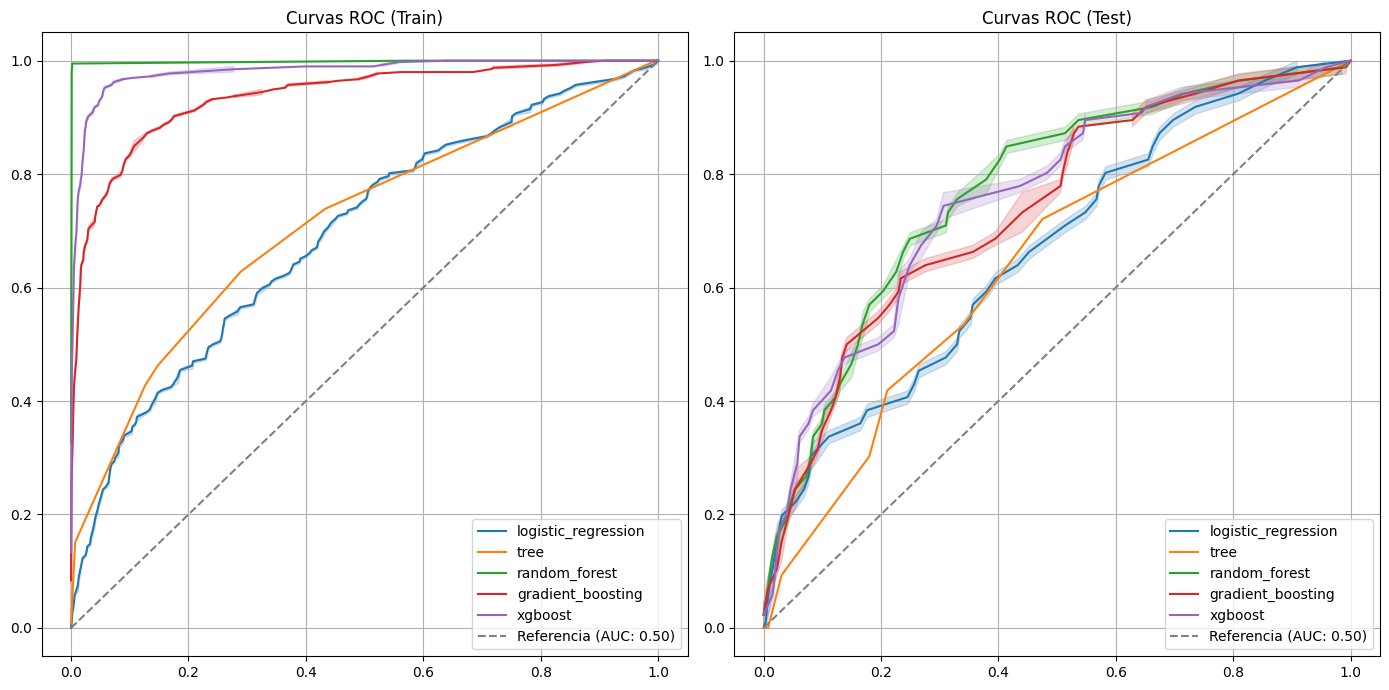

In [56]:
modelo_clasificacion.plot_curvas_roc_train_test()

Viendo las métricas, no merece la pena ponernos a jausta ningún modelo ya que las kappas del test por lo general son bastante malas y va a ser muy complicado subirlas a más de 0.6 simplemente ajustando los parámetros, por lo tanto un putno clave que hemos dejado por el camino es hacer el balanceo. En la siguiente iteración probamos a hacer el balanceo y ver qué métricas obtenemos.